Author: https://github.com/MonteiroOscar98


# Welcome to the Flower of Life Interactive Jupyter Notebook!

Here, we will explore the Flower of Life, a beautiful geometric pattern composed of overlapping circles, using Python and matplotlib. This design has been present in various cultures throughout history and is often associated with sacred geometry.

## What You'll Learn:

- How to generate and visualize the Flower of Life using simple mathematical concepts.
- How to use Matplotlib for creative geometric pattern plotting.
- How to have fun experimenting with different circle arrangements.
- How to animate the Flower of Life pattern, creating a dynamic visualization of this sacred geometry.

## How It Works:

- We define functions to draw circles and arrange them in a hexagonal grid.
- By adjusting parameters like the number of circles (`n`) and radius, we can create different versions of the Flower of Life.
- We generate multiple plots in a subplot layout, allowing you to compare different patterns side by side.
- We also implement an animation function that gradually draws the circles in sequence, creating a lively animation of the Flower of Life pattern.

## Key Functions in the Code:

- **`draw_circle(ax, center, radius, **kwargs)`**: Draws a single circle on the provided Matplotlib axis.
- **`generate_circle_positions(n, radius)`**: Generates positions for the circles arranged in a hexagonal grid pattern, sorted radially from the center.
- **`animate_flower_of_life(n=6, radius=1, interval=500)`**: Creates an animated sequence where circles are drawn one by one, creating the Flower of Life design.

With these functions, you can experiment with different parameters to explore various versions of the Flower of Life and even watch it come to life through animation!


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
# Enable JS-based animation for Jupyter Notebook
rc('animation', html='jshtml')

In [44]:
def draw_circle(ax, center, radius, **kwargs):
    """
    Draws a single circle on the given Matplotlib axis.

    Parameters:
    - ax: Matplotlib axis to draw the circle on.
    - center: Tuple (x, y) representing the circle's center.
    - radius: Radius of the circle.
    - **kwargs: Additional styling arguments for the circle (color, linewidth, etc.).
    """
    circle = plt.Circle(center, radius, fill=False, **kwargs)
    ax.add_patch(circle)

def flower_of_life(ax, n=6, radius=1):
    """
    Draws the Flower of Life pattern by placing circles in a hexagonal grid.

    Parameters:
    - ax: Matplotlib axis to draw the pattern on.
    - n: Number of layers of circles around the central circle.
    - radius: Radius of each individual circle.
    """

    # Set equal aspect ratio to maintain circular shapes
    ax.set_aspect('equal')

    # Define the plotting limits to fit all circles
    ax.set_xlim(-radius * (n + 1), radius * (n + 1))
    ax.set_ylim(-radius * (n + 1), radius * (n + 1))

    # Hide axes for a cleaner look
    ax.axis('off')

    # Draw the central circle
    draw_circle(ax, (0, 0), radius, color='blue', linewidth=1.5)

    # Arrange additional circles in a hexagonal grid pattern
    for i in range(-n, n + 1):
        for j in range(-n, n + 1):
            # Compute the x and y coordinates using hexagonal tiling rules
            x = i * radius * np.sqrt(3) / 2  # Horizontal displacement
            y = j * radius - (i % 2) * radius / 2  # Vertical staggering

            # Ensure circles only appear within a certain range to maintain symmetry
            if np.sqrt(x**2 + y**2) <= n * radius:
                draw_circle(ax, (x, y), radius, color='black', linewidth=1.5)

def plot_flower_of_life_with_subplots():
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

    # Adjust space between subplots
    plt.subplots_adjust(hspace=0.1, wspace=0.1)

    # Plot for n=1 to n=3 on the first row
    flower_of_life(axs[0, 0], n=1, radius=1)
    axs[0, 0].set_title("Flower of Life (n=1)")

    flower_of_life(axs[0, 1], n=2, radius=1)
    axs[0, 1].set_title("Flower of Life (n=2)")

    flower_of_life(axs[0, 2], n=3, radius=1)
    axs[0, 2].set_title("Flower of Life (n=3)")

    # Plot for n=4 to n=6 on the second row
    flower_of_life(axs[1, 0], n=4, radius=1)
    axs[1, 0].set_title("Flower of Life (n=4)")

    flower_of_life(axs[1, 1], n=5, radius=1)
    axs[1, 1].set_title("Flower of Life (n=5)")

    flower_of_life(axs[1, 2], n=6, radius=1)
    axs[1, 2].set_title("Flower of Life (n=6)")

    plt.show()

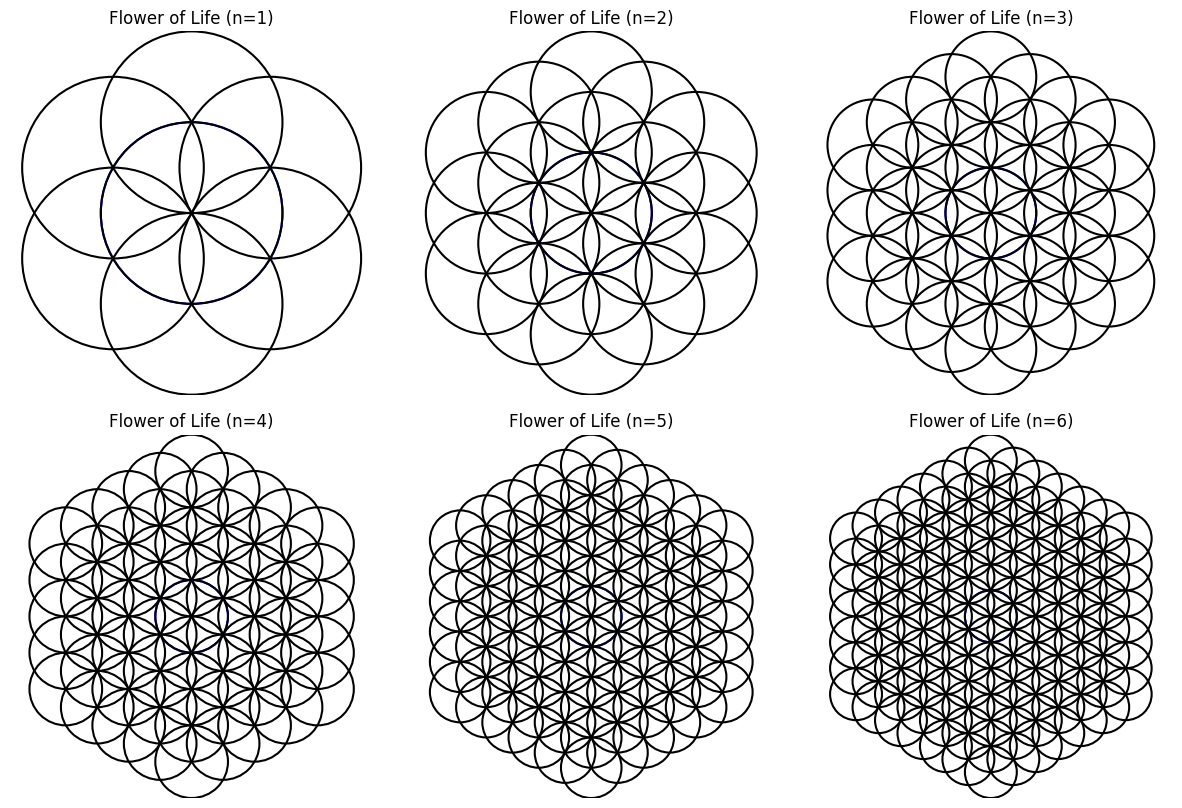

In [40]:
# Run the function to plot the subplots
plot_flower_of_life_with_subplots()

In [45]:
def draw_circle(ax, center, radius, **kwargs):
    """Draws a single circle on the given Matplotlib axis."""
    circle = plt.Circle(center, radius, fill=False, **kwargs)
    ax.add_patch(circle)
    return circle  # Return the circle to keep track of it

def generate_circle_positions(n, radius):
    """Generate positions for circles in a hexagonal grid pattern, sorted radially."""
    positions = [(0, 0)]  # Start with the central circle
    for i in range(-n, n + 1):
        for j in range(-n, n + 1):
            x = i * radius * np.sqrt(3) / 2
            y = j * radius - (i % 2) * radius / 2
            if np.sqrt(x**2 + y**2) <= n * radius:
                positions.append((x, y))

    # Sort positions by distance from the center for a radial effect
    positions.sort(key=lambda pos: np.sqrt(pos[0]**2 + pos[1]**2))
    return positions

def animate_flower_of_life(n=6, radius=1, interval=500):
    """Animates the Flower of Life using Matplotlib's animation framework."""
    positions = generate_circle_positions(n, radius)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_aspect('equal')
    ax.set_xlim(-radius * (n + 1), radius * (n + 1))
    ax.set_ylim(-radius * (n + 1), radius * (n + 1))
    ax.axis('off')

    circles = []  # Store drawn circles

    def update(frame):
        """Update function for the animation."""
        if frame < len(positions):
            new_circle = draw_circle(ax, positions[frame], radius, color='black', linewidth=1.5)
            circles.append(new_circle)

    ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=interval, repeat=False)

    plt.close(fig)  # Prevents the static final frame from being displayed

    return ani  # Return the animation object so Jupyter Notebook can render it

In [42]:
# Run the animation
animate_flower_of_life(n=2, radius=1, interval=500)